In [4]:
import pyxdf 
import numpy as np
import matplotlib.pyplot as plt

# Load Data

Load the data from the experimental input files for a single participant.

In [2]:
streams, header = pyxdf.load_xdf('./Path_Data/ID_100.xdf')
for strm in streams:
    print(f"Found stream {strm['info']['name'][0]} ({strm['info']['type'][0]}) with data shape "
          f"{np.array(strm['time_series']).shape}")

stream_names = [strm['info']['name'][0] for strm in streams]
stream_types = [strm['info']['type'][0] for strm in streams]

luminance_idx = stream_types.index('Luminance')
luminance_tvec = streams[luminance_idx]['time_stamps']

exp_idx = stream_types.index('Experiment')
exp_tvec = streams[exp_idx]['time_stamps']

survey_idx = stream_types.index('Survey')
survey_tvec = streams[survey_idx]['time_stamps']

gaze_idx = stream_types.index('Gaze')
gaze_tvec = streams[gaze_idx]['time_stamps']

pose_idx = stream_names.index('PoseStream')
pose_tvec = streams[pose_idx]['time_stamps']

nav_idx = stream_types.index('Navigation')
nav_tvec = streams[nav_idx]['time_stamps']

creation_idx = stream_types.index('Creation')
creation_tvec = streams[creation_idx]['time_stamps']

tracked_idx = stream_names.index('TrackedPoseStream')
tracked_tvec = streams[tracked_idx]['time_stamps']

Found stream LuminanceStream (Luminance) with data shape (81675, 5)
Found stream ExperimentStream (Experiment) with data shape (88, 6)
Found stream SurveyStream (Survey) with data shape (26, 6)
Found stream GazeStream (Gaze) with data shape (132387, 17)
Found stream TrackedPoseStream (Pose) with data shape (128717, 25)
Found stream NavigationStream (Navigation) with data shape (38492, 9)
Found stream CreationStream (Creation) with data shape (94, 7)
Found stream PoseStream (Pose) with data shape (128717, 25)


In [7]:
nominal_srate = float(streams[gaze_idx]['info']['nominal_srate'][0])
est_srate = 1 / np.median(np.diff(gaze_tvec))
print(f"Nominal srate: {nominal_srate:.3f} Hz\tEst. Srate: {est_srate:.3f} Hz")

chan_labels = [_['label'][0] for _ in streams[gaze_idx]['info']['desc'][0]['channels'][0]['channel']]

#Create an array of all channels where the label starts with "GazeOrigin"
b_gaze_origin = [chan.startswith('GazeOrigin') for chan in chan_labels]
gaze_origin_dat = streams[gaze_idx]['time_series'][:, b_gaze_origin]

#Create a mask of b_gaze_origin using the "GazeRayIsValid" channel
b_gaze_origin = [_.startswith('GazeOrigin') for _ in chan_labels]
gaze_origin_dat = streams[gaze_idx]['time_series'][:, b_gaze_origin]
b_gaze_dir = [_.startswith('GazeDirectionNormalized') for _ in chan_labels]
gaze_dir_dat = streams[gaze_idx]['time_series'][:, b_gaze_dir]

b_valid = streams[gaze_idx]['time_series'][:, chan_labels.index('GazeRayIsValid')] > 0.0

# plt.figure(figsize=(6, 8))
# plt.subplot(2, 1, 1)
# plt.plot(gaze_tvec[b_valid] - gaze_tvec[0], gaze_origin_dat[b_valid])
# plt.title('Gaze Origin')
# plt.subplot(2, 1, 2)
# plt.plot(gaze_tvec[b_valid] - gaze_tvec[0], gaze_dir_dat[b_valid])
# plt.title('Gaze Direction')
# plt.show()

Nominal srate: 0.000 Hz	Est. Srate: 91.304 Hz


['UserID', 'BlockID', 'ModelID', 'MethodID', 'Luminance']


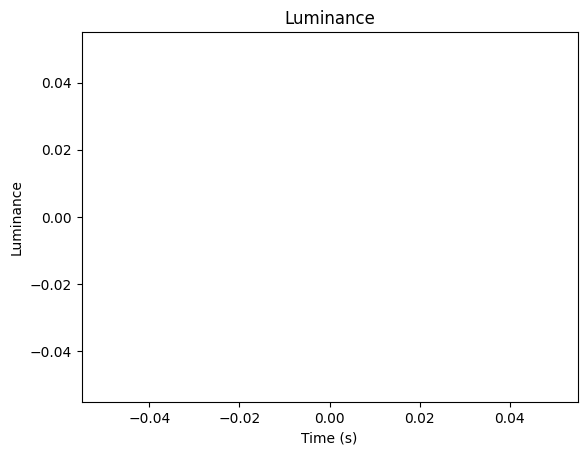

In [11]:
#get nominal and estimated sampling rates for each stream
nominal_srates = [float(_['info']['nominal_srate'][0]) for _ in streams]
est_srates = [1 / np.median(np.diff(_['time_stamps'])) for _ in streams]

#get the channel labels for the luminance stream
chan_lum = [_['label'][0] for _ in streams[luminance_idx]['info']['desc'][0]['channels'][0]['channel']] 
#print(chan_lum)

#get the index of the luminance channel label in the luminance stream
b_luminance = [chan.startswith('Luminance') for chan in chan_lum]
luminance = streams[luminance_idx]['time_series'][:, b_luminance]

#plot the luminance values
plt.figure()
plt.plot(luminance_tvec, luminance)
plt.xlabel('Time (s)')
plt.ylabel('Luminance')
plt.title('Luminance')
plt.show()

